频域匹配滤波有三种方式：

   1. 方式1的匹配滤波器：时间反褶后取复共轭，计算Nfft点补零DFT
    H1(f) = fft(conj(s(-t)),Nfft)

   2. 方式2的匹配滤波器：补零后计算Nfft点DFT，对结果取复共轭
    H2(f) = conj(fft(s(t),Nfft))

   3. 方式3的匹配滤波器：直接在频域生成匹配滤波器
    H3(f) = exp(1i*pi*f.^2/K)列表内容

滤波器的形式不对，滤波后脉冲峰值的位置也不同，方式1的脉冲在信号尾部，方式2的脉冲在信号前部，方式3的脉冲与信号零频位置对准。


In [43]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft,fftshift,ifft,ifftshift

from scipy.special import iv

plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体 
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题 

In [44]:
TBP = 724;               # 时间带宽积
T = 42e-6;               # 信号持续时间

Nfft = 2**11
B = TBP/T;               # 信号带宽
K = B/T;                 # 调频率

ratio = 1.07             # 过采样率
F = ratio*B              # 采样频率
N = int( 2*np.ceil(F*T/2) ) #采样点数

dt = T/N
df = F/N


t = np.arange(-T/2,T/2,dt)
f = np.arange(-F/2,F/2,df)

st = np.exp(1j*np.pi*K*t**2)  #  % 生成信号
Sf = fft(st)
window = np.kaiser(N,2.5); #  % 窗
Window = fftshift(window)

Out = np.exp(1j*np.pi*f**2/K)
Hf3 = Window*Out                    # % 方式3的匹配滤波器：直接在频域生成匹配滤波器

Hf_phi = np.pi*f**2/K
Hf_freq = f


In [45]:


# Hf3=fftshift(ifft(Hf3));

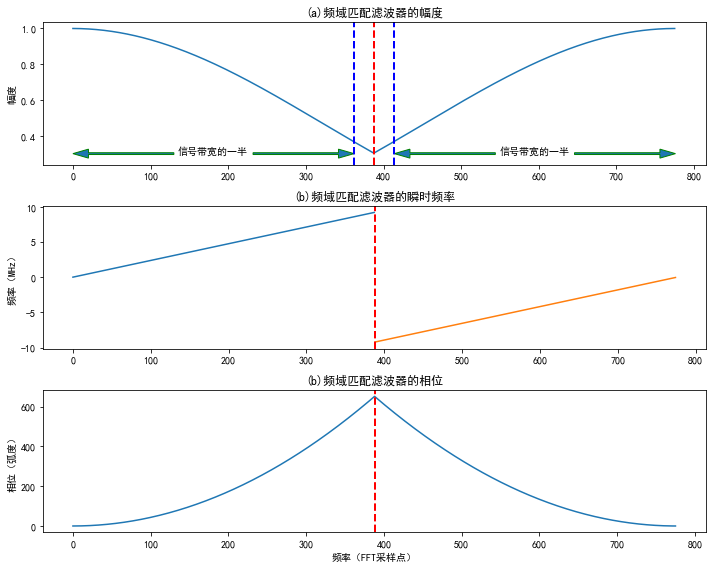

In [84]:
fig = plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
plt.plot(np.abs(Hf3));
plt.axvline(x=388, c="r", ls="--", lw=2)
plt.axvline(x=362, c="b", ls="--", lw=2)
plt.axvline(x=414, c="b", ls="--", lw=2)
plt.arrow(130, 0.3,-110, 0, width = 0.01, head_width=0.05,head_length=20, ec ='green') 
plt.arrow(232, 0.3, 110, 0, width = 0.01, head_width=0.05,head_length=20, ec ='green') 
plt.arrow(544, 0.3,-110, 0, width = 0.01, head_width=0.05,head_length=20, ec ='green') 
plt.arrow(646, 0.3, 110, 0, width = 0.01, head_width=0.05,head_length=20, ec ='green') 
plt.text(135, 0.3, "信号带宽的一半");plt.text(550, 0.3, "信号带宽的一半")
plt.title('(a)频域匹配滤波器的幅度');plt.ylabel('幅度');
plt.subplot(3,1,2);
plt.plot(np.arange(0,388),Hf_freq[388:]*1e-6)
plt.plot(np.arange(388,775),Hf_freq[:387]*1e-6)
plt.axvline(x=388, c="r", ls="--", lw=2)
plt.title('(b)频域匹配滤波器的瞬时频率');plt.ylabel('频率（MHz）')
plt.subplot(3,1,3);
plt.plot(fftshift(Hf_phi))
plt.axvline(x=388, c="r", ls="--", lw=2)
plt.title('(b)频域匹配滤波器的相位');plt.ylabel('相位（弧度）');plt.xlabel('频率（FFT采样点）');
fig.tight_layout()